<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch05_TD_Ex5_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch5 - Notebook : Statistiques bivari√©es :** 
## **Exercice 4 "Analyse multivari√©e : D√©cathlon"**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Th√∂ni - Lyc√©e Saint-Charles Sainte Croix - LE MANS**

# **L' "Analyse en Composantes Principales" (ACP)**


![ACP](https://drive.google.com/uc?id=1Ha2-PZQkoQghBFH13R0gCyr57h2c5AsE)
### **1.2.a/ la classification des iris**

Pour que les choses restent visibles : commen√ßons par passer de 3 √† 2 dimensions, avec ce grand classique des *data sets*.

![Iris](https://drive.google.com/uc?id=1eIZvGr1rIH-Af9AtnLzOY7rmO05oyGpZ)

Il s'agit d'un jeu de donn√©es, directement accessible dans le module **Scikit Learn**, au format *txt* ou ici, au format csv :


https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 

**R√©cup√©ration des donn√©es**


R√©cup√©rons-le et transformons-le en DataFrame **Pandas**.

Pour les 150 "individus" du jeu de donn√©es, on mesure la longueur du s√©pale, la largeur du s√©pale, la longueur du p√©tale et la largeur du p√©tale, et enfin, on indique son esp√®ce (qui sera l'objet des pr√©dictions).

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'classe']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.head()

sepal_len  sepal_wid  petal_len  petal_wid       classe
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa

In [ ]:
df.iat[3,2]

1.5

In [ ]:
df.loc[2]

sepal_len            4.7
sepal_wid            3.2
petal_len            1.3
petal_wid            0.2
classe       Iris-setosa
Name: 2, dtype: object

In [ ]:
m = len(df)
m

150

S√©parons donn√©es et classes √† pr√©dire

In [ ]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values # donn√©es mesur√©es, "iloc" : localisation index√©e
y = df.iloc[:,4].values # esp√®ce de l'iris

Nous affichons la dimension de la matrice, nous r√©cup√©rons le nombre d‚Äôobservations (n =
150) et de variables (p = 3), enfin nous affichons les valeurs-m√™mes.


In [ ]:
#dimension
print(X.shape) 
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des donn√©es
print(X)


(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

**Visualisation**

Visualisons le nuage dans le plan de deux des variables...
Pour le fun !

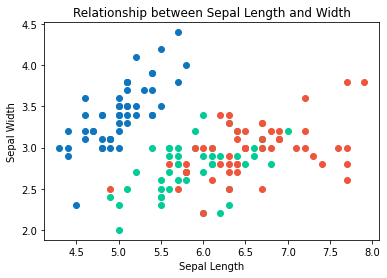

In [ ]:
fig, ax = plt.subplots()

colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}

        
for Swidth, Slength, Specie in zip(df['sepal_wid'], df['sepal_len'], df['classe']):
    plt.scatter(x=Slength, y=Swidth, color=colors[Specie])

ax.set(xlabel="Sepal Length",
       ylabel="Sepal Width",
      title="Relationship between Sepal Length and Width")

plt.show()

Pour visualiser l'ensemble du nuage √† quatre dimensions, on n'a d'autre recours que de visualiser dans les plans de deux dimensions.
Voici toutes ces vues...

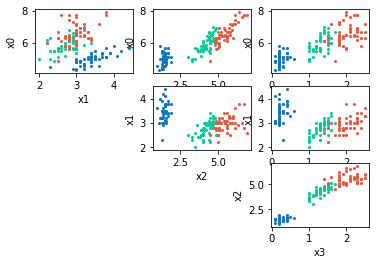

In [ ]:
colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for i in range(4) :
    for j in range(0,i) :
        plt.subplot(3,3,(i)+3*(j))
        
        for vi,vj,specie in zip(df.iloc[:,i],df.iloc[:,j],df.iloc[:,4]) :
            plt.scatter(x=vi,y=vj,color = colors[specie], s=4)
        
        plt.xlabel('x'+str(i))
        plt.ylabel('x'+str(j))
        #pd.scatter_matrix marcherait aussi, voir pour les couleurs...)

plt.show()




Bon... j'ai un peu gal√©r√©, mais je suis content du r√©sultat...
On voit clairement qu'une esp√®ce est clairement s√©par√©e des deux autres.


Pour que la visualisation soit possible, et afin de donner du sens √† la **r√©duction de dimensions** par **Analyse en Composantes Principales**, oublions la 1√®re dimension et travaillons sur les trois autres.

In [ ]:
X = df.iloc[:,1:4].values # donn√©es mesur√©es
#X

**Visualisation du nuage √† 3 dimensions**

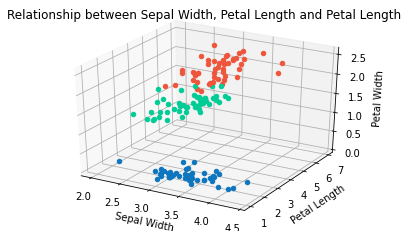

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =X[:,0]
y =X[:,1]
z =X[:,2]
colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for xx,yy,zz,specie in zip(x,y,z,df.iloc[:,4]) :
    ax.scatter(xx,yy,zz, color = colors[specie], marker = 'o')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

ax.set_title("Relationship between Sepal Width, Petal Length and Petal Length")
plt.show()


**Normalisation**

Avant tout travail de r√©duction de la dimensionnalit√©, il faut **normaliser** les donn√©es, c'est-√†-dire les **centrer** (leur soustraire leur moyenne) et les **r√©duire** (diviser par leur √©cart-type)

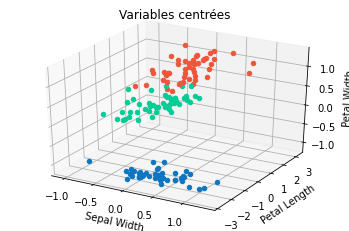

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def centrage(s):
    return s - np.mean(s)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_centree = centrage(x)
y_centree = centrage(y)
z_centree = centrage(z)

colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for xx,yy,zz,specie in zip(x_centree,y_centree,z_centree,df.iloc[:,4]) :
    ax.scatter(xx,yy,zz, color = colors[specie], marker = 'o')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

ax.set_title("Variables centr√©es")
plt.show()

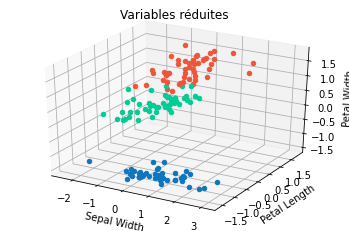

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def reduire(s):
    return centrage(s) / np.std(s)

x_reduite = reduire(x)
y_reduite = reduire(y)
z_reduite = reduire(z)

colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for xx,yy,zz,specie in zip(x_reduite,y_reduite,z_reduite,df.iloc[:,4]) :
    ax.scatter(xx,yy,zz, color = colors[specie], marker = 'o')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

ax.set_title("Variables r√©duites")
plt.show()

Les trois figures sont les m√™mes... √† l'√©chelle des axes pr√®s !

Vu en 3D anim√©, voici notre nuage de points...

![Iris 3D anim√©‚Ä¶](https://github.com/njanakiev/blender-scripting/blob/master/img/fisher_iris_visualization.gif?raw=true)

L'ACP va consister √† trouver l'axe de perspective dans lequel le nuage sera le plus dispers√©, et ceci √©tant fait, le 2√®me axe apr√®s ce premier (il est perpendiculaire au premier)


***Remarque :***
Le module *ScikitLearn* comprend une commande, *StandardScaler*, permettant la normalisation (standardisation) en une ligne... une fois qu'on a compris les paragraphes pr√©c√©dents...

In [ ]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation ‚Äì centrage-r√©duction
Z = sc.fit_transform(X)
print(Z)

[[ 1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [ 3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [ 1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [ 1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [ 1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [ 8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [ 8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [ 1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [ 1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [ 8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [ 2.18907205e+00 -1.45500381e+00 -1.31297673e+00]
 [ 3.11468391e+00 -1.28440670e+00 -1.05003079e+00]
 [ 1.95766909e+00 -1.39813811e+00 -1.05003079e+00]
 [ 1.03205722e+00 -1.34127240e+00 -1.18150376e+00]
 [ 1.72626612e+00 -1.17067529e+00 -1.18150376e+00]
 [ 1.72626612e+00 -1.28440670e+



### **ACP et aide √† l'interpr√©tation**

*inspiration : http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf*

L' "Analyse en composante Principale" consiste √† tenter d'observer le nuage de points sous un angle (ici projection sur un plan, donc d√©termin√© par deux vecteurs) o√π la dispersion est la plus importante, afin de faire appara√Ætre au mieux les clusters.
On cherche pour cela des tendances dans le nuage, ce sont les vecteurs propres de la matrice de corr√©lations qui d√©terminent ces tendances : les valeurs propres associ√©es indiquent la part que prend chaque tendance dans la variance totale du nuage.
Pour passer de 3 √† deux dimensions, il s'agit donc de trouver les deux vecteurs propres associ√©s aux deux plus fortes valeurs propres.

Le fait que nos donn√©es soient √©tiquet√©es, ici, permettra de donner du sens aux tendances d√©gag√©es.


**Matrice des corr√©lations**

( covariances divis√©es par le produit des √©carts-types)

In [ ]:
df3var = df.iloc[:,1:4]
df_mat_corr = df3var.corr()
df_mat_corr

sepal_wid  petal_len  petal_wid
sepal_wid   1.000000  -0.420516  -0.356544
petal_len  -0.420516   1.000000   0.962757
petal_wid  -0.356544   0.962757   1.000000

Longueur et largeur du p√©tale sont tr√®s positivement corr√©l√©es et suffiraient √† classifier nos iris

**visualisation en couleur de la matrice des corr√©lations**

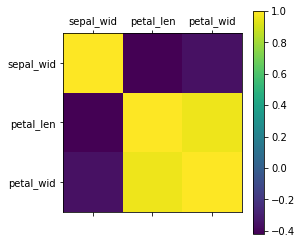

In [ ]:
plt.matshow(df3var.corr())
plt.xticks(range(len(df3var.columns)), df3var.columns)
plt.yticks(range(len(df3var.columns)), df3var.columns)
plt.colorbar()
plt.show()


**Valeurs propres et vecteurs propres de la matrice de corr√©lation :**

√ßa marche avec simplement Numpy :

In [ ]:
import numpy as np
np_mat_corr = np.array(df_mat_corr) # On retype le Dataframe Pandas en Array de Numpy
np_mat_corr

array([[ 1.        , -0.4205161 , -0.35654409],
       [-0.4205161 ,  1.        ,  0.9627571 ],
       [-0.35654409,  0.9627571 ,  1.        ]])

In [ ]:
np.linalg.eig(np_mat_corr)

(array([2.2120434 , 0.75324395, 0.03471265]),
 array([[ 0.41314159, -0.90895312, -0.05584127],
        [-0.64998631, -0.25137587, -0.71716663],
        [-0.6378337 , -0.33258742,  0.69466091]]))

On obtient les trois valeurs propres (*Eingen Value in english*) et les vecteurs-colonnes propres associ√©s.



---



On peut aussi fort bien faire faire le m√™me travail √† *ScikitLearn* , en travaillant directement sur les valeurs de notre tableau Z, des donn√©es normalis√©es :

On importe l'objet PCA du module *ScikitLearn*.*decomposition* et on l'instancie :

In [ ]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')
# Le param√®tre svd_solver plac√© √† "Full" indique que
# l'on va travailler sur la totalit√© des donn√©es, vu qu'elles sont peu nombreuses.

Nous pouvons lancer les traitements : la fonction ***fit_transform()***
renvoie en sortie les coordonn√©es factorielles F<sub>ik</sub> que nous collectons dans la variable *coord*

In [ ]:
#calculs
coord = acp.fit_transform(Z)

La propri√©t√© ***.explained_variance_*** semble faire l‚Äôaffaire pour obtenir les variances (valeurs propres, Œª<sub>k</sub>) associ√©es aux axes factoriels.

Il est n√©cessaire de d√©biaiser les variances exp√©rimentales par le coefficient (n-1)/n

In [ ]:
#valeurs propres corrig√©es
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.2120434  0.75324395 0.03471265]


Youpi, les m√™mes que ci-dessus !!!

PCA fournit √©galement les proportions de variance associ√©es aux axes :


In [ ]:
#proportion de variance expliqu√©e
print(acp.explained_variance_ratio_)

[0.7373478  0.25108132 0.01157088]


C'est l√† que commence l'analyse des r√©sultats !!!

La 1<sup>√®re</sup> composante accapare 73,73% de l'information disponible.
Avec la 2<sup>√®me</sup>, on arrive √† 73,73 + 25,10 = 98,83% de l'information globale ! La derni√®re semble anecdotique.

Confirmons cela par l' **"√©boulis des valeurs propres"** (*Scree Plot*)

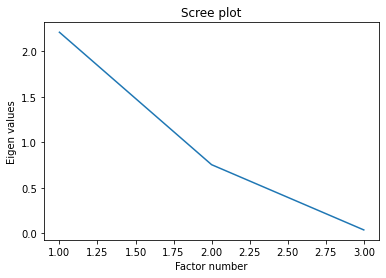

In [ ]:
#scree plot
plt.plot(np.arange(1,4),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


... ou par la courbe de cumul de variance restitu√©e selon le nombre de facteurs : courbe ***ROC*** (*Receiving Operator Characteristic*) qui est commun√©ment utilis√©e pour mesurer la performance d'un classifieur.

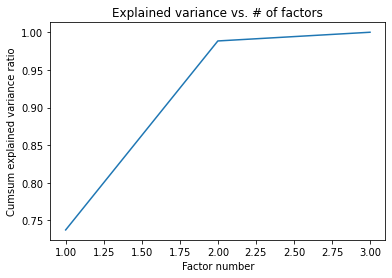

In [ ]:
#cumul de variance expliqu√©e
plt.plot(np.arange(1,4),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

Dans les deux cas les "coudes" (cassures) indiquent le nombre de facteurs √† retenir.



---

Il existe deux outils pour une interpr√©tation facile de l'ACP :
* la repr√©sentation des individus dans le plan factoriel
* la projection des variables dans le plan factoriel.

**Repr√©sentation des individus : coordonn√©es factorielles**

Les coordonn√©es factorielles (F<sub>ik</sub>) des individus ont √©t√©
collect√©es dans la variable *coord*. Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximit√©s entre les iris.
Deux commentaires au pr√©alable :
1. L‚Äôajout d‚Äôune √©tiquette dans un graphique nuage de points n‚Äôest pas tr√®s pratique sous Python (librairie Matplotlib), ma solution a le m√©rite de fonctionner, il y a plus simple avec la biblioth√®que *Seaborn*.
2. Les outils graphiques calculent souvent automatiquement les √©chelles en fonction des plages de valeurs. Ce n‚Äôest pas une bonne id√©e en ce qui concerne l‚ÄôACP. En effet, les axes n‚Äôont pas la m√™me importance (% de variance restitu√©e). Pour ne pas fausser la perception des proximit√©s, il est tr√®s important de veiller √† ce que les √©chelles soient identiques en abscisses et en ordonn√©es. Respecter cette r√®gle nous dispense de faire afficher les pourcentages de variance port√©s par les axes. 




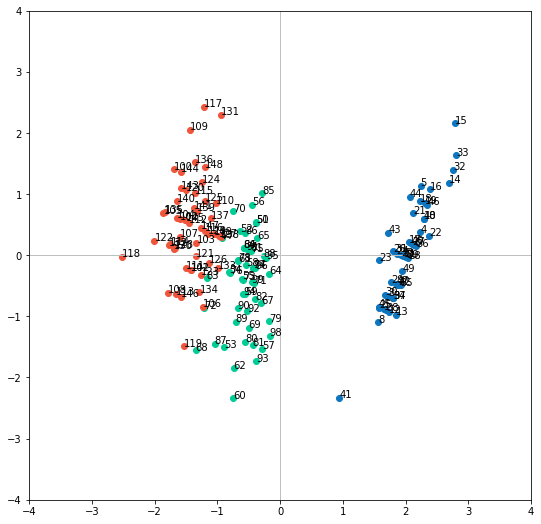

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(9,9))
axes.set_xlim(-4,4) #m√™me limites en abscisse
axes.set_ylim(-4,4) #et en ordonn√©e

#placement des √©tiquettes des observations
colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for i,Specie in zip(range(n), df['classe']):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
    plt.scatter(x=coord[i,0], y=coord[i,1], color=colors[Specie])

#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

Yes !!!

Comme nos donn√©es √©taient √©tiquet√©es (ce qui n'est pas une obligation), nous avons pu colorer selon les esp√®ces, et nous constatons que nous avons plut√¥t bien r√©ussi √† s√©parer les clusters.
Ainsi, si d'autres individus se pr√©sentent, en les projetant √©galement sur notre plan factoriel, nous serons en mesure de les classifier !

**Qualit√© de la repr√©sentation des individus dans le plan factoriel : les Cos¬≤ (cosinus carr√©s)**

Pour calculer la qualit√© de repr√©sentation des individus sur les axes, nous devons d‚Äôabord calculer les carr√©s des distances √† l‚Äôorigine des individus, qui correspondent √©galement √† leur contribution dans l‚Äôinertie totale.

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))

      ID       d_i
0      0  4.588062
1      1  3.538534
2      2  3.792840
3      3  3.384939
4      4  5.119251
..   ...       ...
145  145  2.783974
146  146  2.991940
147  147  1.797338
148  148  3.608776
149  149  1.222449

[150 rows x 2 columns]


In [ ]:
#qualit√© de repr√©sentation des individus - COS2
cos2 = coord**2
for j in range(3):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.994107  0.005880
1      1  0.776532  0.222556
2      2  0.937630  0.061012
3      3  0.870217  0.129780
4      4  0.972507  0.027409
..   ...       ...       ...
145  145  0.816759  0.118358
146  146  0.830767  0.155068
147  147  0.878198  0.109113
148  148  0.398655  0.577758
149  149  0.904755  0.095177

[150 rows x 3 columns]


In [ ]:
#contributions aux axes
ctr = coord**2
for j in range(3):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.013746  0.000239
1      1  0.008281  0.006970
2      2  0.010718  0.002048
3      3  0.008878  0.003888
4      4  0.015004  0.001242
..   ...       ...       ...
145  145  0.006853  0.002916
146  146  0.007491  0.004106
147  147  0.004757  0.001736
148  148  0.004336  0.018453
149  149  0.003333  0.001030

[150 rows x 3 columns]


**Repr√©sentation des variables : 2<sup>√®me</sup> outil pour l'interpr√©tation de l'ACP**

Nous avons besoin des vecteurs propres pour l‚Äôanalyse des variables. Ils sont fournis par le champ **.components_**





In [ ]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[ 0.41314159 -0.64998631 -0.6378337 ]
 [ 0.90895312  0.25137587  0.33258742]
 [-0.05584127 -0.71716663  0.69466091]]


*Note : les facteurs sont en ligne, les variables en colonne, nous devons en tenir compte pour obtenir les corr√©lations (variables x facteurs, ùëü<sub>ùëóùëò</sub>) en les multipliant par la racine carr√©e des valeurs propres :*

In [ ]:
#racine carr√©e des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corr√©lation des variables avec les axes
corvar = np.zeros((3,3))
for k in range(3):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corr√©lations variables x facteurs
print(corvar)


[[ 0.61446301  0.78887703 -0.01040397]
 [-0.96672072  0.21816818 -0.13361769]
 [-0.94864622  0.28865139  0.12942458]]


Les variables sont maintenant en ligne, les facteurs en colonne.

Si l‚Äôon s‚Äôen tient sp√©cifiquement aux deux premiers facteurs :

In [ ]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      COR_1     COR_2
0  0.614463  0.788877
1 -0.966721  0.218168
2 -0.948646  0.288651


Ainsi, la 1<sup>√®re</sup> variable(largeur du s√©pale) intervient assez fortement et positivement sur les deux axes factoriels, tandis que les deux autres (longueur et largeur du p√©tale), tr√®s fortement n√©gativement sur le 1<sup>er</sup> axe et de mani√®re l√©g√®rement positive sur le 2<sup>nd</sup>. Ces deux derni√®res sont tr√®s proches l'une de l'autre, comme on le pressentait d√©j√† dans la matrice des corr√©lations.



---

Nous pouvons dessiner maintenant le cercle des corr√©lations :



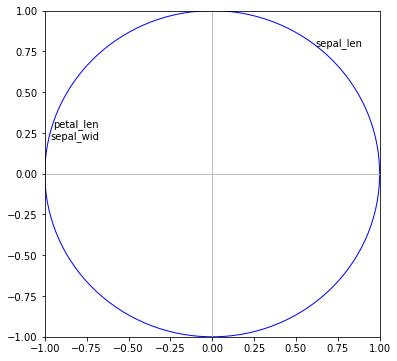

In [ ]:
#cercle des corr√©lations
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des √©tiquettes (noms des variables)
for j in range(3):
 plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()